### NLP task - Identifying bots amongst annotators


* Task - While crowdsourcing the annotation of our classification datasets, we have seen a number of bots taking up the tasks. We have asked several MTurk people to annotate texts with a true/false value depending on whether the texts are relevant to a topic of Hacker Attack. There's no way to identify the untrustworthy annotators except through their responses. The goal of this issue is to filter out those bots.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum width of the table cells to 500 characters
pd.set_option('display.max_colwidth', 500)

Import the file and conduct an EDA.

In [76]:
df = pd.read_csv('./data/nlp-challenge.csv') 
df.head(10)

,Annotator ID,Text,Answer
0,A1MG8KNVSVZ365,@cz_binance Thanks for being upfront about this CZ. Your fans still believe in you. Plug the holes that need to be plugged. You'll be fine. Good luck.,True
1,A3OCJJMRKAIJZA,@cz_binance Thanks for being upfront about this CZ. Your fans still believe in you. Plug the holes that need to be plugged. You'll be fine. Good luck.,True
2,AQIP3DSYXEXX5,@cz_binance Thanks for being upfront about this CZ. Your fans still believe in you. Plug the holes that need to be plugged. You'll be fine. Good luck.,True
3,A1MG8KNVSVZ365,"@cz_binance The speed with which Binance has responded to their security incidentincluding public disclosureis impressive, and I admire the clarity of the message that they take responsibility and will make the users whole.",False
4,A3MV3PT4TOO69P,"@cz_binance The speed with which Binance has responded to their security incidentincluding public disclosureis impressive, and I admire the clarity of the message that they take responsibility and will make the users whole.",True
5,AQIP3DSYXEXX5,"@cz_binance The speed with which Binance has responded to their security incidentincluding public disclosureis impressive, and I admire the clarity of the message that they take responsibility and will make the users whole.",True
6,A1MG8KNVSVZ365,"@ByzBox @cz_binance The big difference is that governments allow the banks to be corrupt, which makes governments corrupt too. Despite all of these entities being corrupt, Binance isn't protected by governments the way banks are. This scandal does affect Binance.",False
7,A3MV3PT4TOO69P,"@ByzBox @cz_binance The big difference is that governments allow the banks to be corrupt, which makes governments corrupt too. Despite all of these entities being corrupt, Binance isn't protected by governments the way banks are. This scandal does affect Binance.",True
8,AGRYG65WJ1CKJ,"@ByzBox @cz_binance The big difference is that governments allow the banks to be corrupt, which makes governments corrupt too. Despite all of these entities being corrupt, Binance isn't protected by governments the way banks are. This scandal does affect Binance.",False
9,A1MG8KNVSVZ365,@King_Tech__ You might have to read the terms and conditions... No use talking now since your funds are already in hotbit and no exchange will give a choice like that... Hope we are smart enough to understand that... Money is money either way doesn't come 4r free unless they want something,False


In [4]:
df.shape

(36417, 3)

In [60]:
# Find out the Average number of annotations per Text.
df.shape[0] / df['Text'].nunique()

3.000494356101178

In [77]:
# Check out if there are duplicates in the dataset
df.duplicated().sum()

0

In [78]:
# Check out if there are NaN values in the dataset
df.isna().sum()

Annotator ID    0
Text            0
Answer          0
dtype: int64

### First hypothesis:
bots consistently provide identical responses when annotating text.

In [79]:
# Calculate whether the annotator always marked texts with the same answer (1) or gave different answers (2)
annotators_stat = df.groupby('Annotator ID')['Answer'].nunique().reset_index(name='Count unique Answers')
annotators_stat

,Annotator ID,Count unique Answers
0,A16184N1RO5OJV,2
1,A198H320N5MSXX,2
2,A19X8IA9EKC3XH,2
3,A1DP551UV06FN6,2
4,A1G187YBG0DVMQ,2
5,A1M5BJTQIXCM33,2
6,A1MG8KNVSVZ365,2
7,A1MJVTR0PCKBWW,2
8,A1R0689JPSQ3OF,2
9,A1SN0UU3V61IIM,1


In [80]:
# Count quantity of unique annotations by annotator
answers_count = df.groupby('Annotator ID')['Text'].count().reset_index(name='Count unique Texts') 
answers_count

,Annotator ID,Count unique Texts
0,A16184N1RO5OJV,119
1,A198H320N5MSXX,6
2,A19X8IA9EKC3XH,429
3,A1DP551UV06FN6,39
4,A1G187YBG0DVMQ,6
5,A1M5BJTQIXCM33,124
6,A1MG8KNVSVZ365,3561
7,A1MJVTR0PCKBWW,980
8,A1R0689JPSQ3OF,31
9,A1SN0UU3V61IIM,5


In [81]:
# Merge the two Dataframes
annotators_stat = pd.merge(annotators_stat, answers_count, on='Annotator ID')

In [83]:
annotators_stat[annotators_stat['Count unique Answers'] == 1]

,Annotator ID,Count unique Answers,Count unique Texts
9,A1SN0UU3V61IIM,1,5
11,A27W025UEXS1G0,1,1
16,A2GO2OXS4VM1PR,1,2
21,A2QTL039A5VV3I,1,1
43,AKSJ3C5O3V9RB,1,2
50,AXY0D2AMLKE2A,1,17


Annotators who provided the same answer to all texts had a limited number of responses. Therefore, the initial hypothesis was not validated.

### Second hypothesis:
The responses of bots often do not match the responses of real annotators. Therefore, we will set the accuracy threshold at 25%. So if the percentage of answers different from the majority exceeds 25%, then we are probably dealing with a bot.

In [84]:
# Find the rows with unique combinations of 'Text' and 'Answer'
unique_rows = df.drop_duplicates(subset=['Text', 'Answer'], keep=False)

# Create a new DataFrame with the selected rows and check it's rows samples
unique_df = pd.DataFrame(unique_rows)
unique_df.sample(10)

,Annotator ID,Text,Answer
16699,A3OCJJMRKAIJZA,"@DarkCryptoLord @kucoincom Why do we still have/use CEXs? The liquidity should be sucked out from them like you distribute/take all left assets from a dead person. Whoever sents money to a dying person soon to be dead should know better. Hard talk here but dinosaurs also didn't make it at the end<span class='emoji-bytes' data-emoji-bytes='[240, 159, 152, 130]'></span>",True
20979,A3BISMR4GI02ZG,"@Paisan26849860 @moneywraith @BitrueOfficial How much do they insure? 10 , 100, 1000They never give the full amount.Even real banks only insure account till like 100k",False
56,AQIP3DSYXEXX5,@sheldonbitmart @BitMartExchange hopefully you can buy back my rug pulled tokens on your platform aswell wtf am I gonna do wit 35 trillion tzki tokens at least give me the 3.18 you value it at.,False
25375,A3BISMR4GI02ZG,"@EthereumBlue Thanks a million, I managed to withdraw 60% of my funds from Etherdelta before the hackers cleaned me out thanks to your video - no thanks to @etherdelta . Please send me you wallet address so I can show my appreciation. Respect.",False
30243,A3OCJJMRKAIJZA,The #DogeBonk community dodged another bullet with the recent #bitmarthack. $DOBO was offered a listing at #BitMart but decided not to accept. Good decision. #CryptocurrencyNews #BSCGem #BTC #Hacked https://t.co/blXz9NzTgv,True
15028,A3BCKNE5CWHODZ,"@Mike28356315 @BitrueOfficial I think you'll regret later. This exchange rules, just a hiccup in a long journey. BTR is gonna be a smash hit success",True
5002,A3MV3PT4TOO69P,@1cyrilblanc1 @spiroseliot Also worth remembering that @bitfinex is victim as somebody has destroyed their business until we know otherwise,True
12566,AQIP3DSYXEXX5,@nutbutterzzz @justinsuntron @binance @cz_binance :) Peach has never showed to me or to anyone how much he still holds. However that is not important. No trolling allowed. Husky shows great similarities with Peach in terms of his style and everything else. Thanks for supporting me and you make me possible to buy Yeed for cheap,True
12406,A2LU259QPV1I4V,@crypto_bobby no they didn't even technically lose their money since exchange balances are IOUs that say kucoin is obligated to give you something. Kucoin lost money which means they may or may not honor IOUs. You lost your money as soon as you deposited,True
584,ARW1TCHCLEK1W,"@Atiyda We love you too We'll continue improving to make Bitrue the #1 exchange worldwide, this is just a little setback on our journey",False


In [85]:
# Count rows in the Dataframe
unique_df.shape

(7792, 3)

In [99]:
# Calculate the number of rows in the Dataframe for each annotator
uniq_answer_count = unique_df.groupby('Annotator ID')['Text'].count().reset_index(name='Count unique text/annot') 
uniq_answer_count

,Annotator ID,Count unique text/annot
0,A16184N1RO5OJV,10
1,A198H320N5MSXX,1
2,A19X8IA9EKC3XH,19
3,A1DP551UV06FN6,5
4,A1M5BJTQIXCM33,27
5,A1MG8KNVSVZ365,961
6,A1MJVTR0PCKBWW,81
7,A1R0689JPSQ3OF,4
8,A1YSYI926BBOHW,16
9,A292TFDMNVS0TP,3


In [100]:
# Merge this dataframe to the annotators_stat dataframe
annotators_stat = pd.merge(annotators_stat, uniq_answer_count, on='Annotator ID', how='left')
annotators_stat['Count unique text/annot'].fillna(0, inplace=True)

In [101]:
annotators_stat.head()

,Annotator ID,Count unique Answers,Count unique Texts,Count unique text/annot
0,A16184N1RO5OJV,2,119,10.0
1,A198H320N5MSXX,2,6,1.0
2,A19X8IA9EKC3XH,2,429,19.0
3,A1DP551UV06FN6,2,39,5.0
4,A1G187YBG0DVMQ,2,6,0.0


In [102]:
# Select annotators with more than 20 answers to reduce random outliers
annotators_more_20 = annotators_stat.loc[annotators_stat['Count unique Texts'] > 20]
annotators_more_20.head()

,Annotator ID,Count unique Answers,Count unique Texts,Count unique text/annot
0,A16184N1RO5OJV,2,119,10.0
2,A19X8IA9EKC3XH,2,429,19.0
3,A1DP551UV06FN6,2,39,5.0
5,A1M5BJTQIXCM33,2,124,27.0
6,A1MG8KNVSVZ365,2,3561,961.0


In [103]:
# Calculate the percentage of suspicious responses from selected annotators
Percentages = pd.DataFrame({
    'Annotator ID': annotators_more_20['Annotator ID'],
    'Percentage': annotators_more_20['Count unique text/annot'] * 100 / annotators_more_20['Count unique Texts']
})

Percentages

,Annotator ID,Percentage
0,A16184N1RO5OJV,8.403361
2,A19X8IA9EKC3XH,4.428904
3,A1DP551UV06FN6,12.820513
5,A1M5BJTQIXCM33,21.774194
6,A1MG8KNVSVZ365,26.986801
7,A1MJVTR0PCKBWW,8.265306
8,A1R0689JPSQ3OF,12.903226
10,A1YSYI926BBOHW,19.047619
13,A2A78DMGLC1S0Y,19.000000
14,A2CJFO19NY4T5R,33.333333


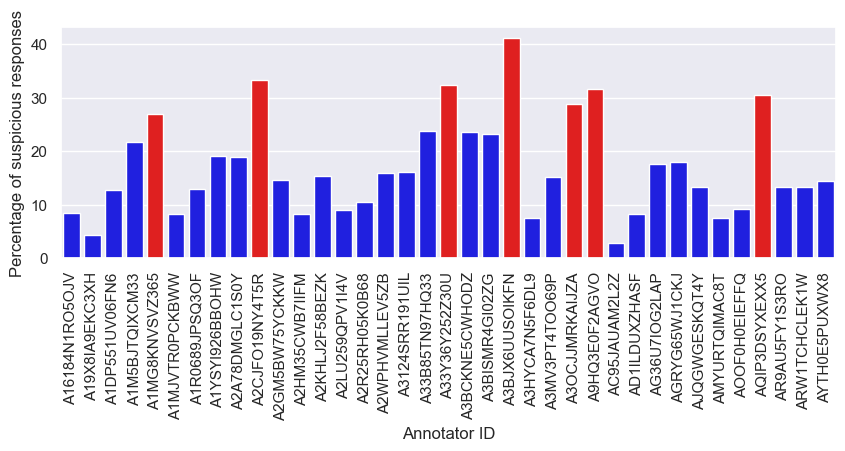

In [107]:
# Visualize the data
sns.set(rc={'figure.figsize':(10, 3)})

# Select annotators with over 25% of suspicious responses
colors = ['red' if count >= 25 else 'blue' for count in Percentages['Percentage']]

# Create the bar plot with colors set by 'Count'
sns.barplot(x='Annotator ID', y='Percentage', data=Percentages, palette=colors)

plt.xlabel('Annotator ID')
plt.ylabel('Percentage of suspicious responses')
plt.xticks(rotation=90)
plt.show()

In [111]:
# Select annotators with over 25% of suspicious responses
Bot_IDs = Percentages.loc[(Percentages['Percentage'] >= 25)]['Annotator ID'].tolist()
print(Bot_IDs)

['A1MG8KNVSVZ365', 'A2CJFO19NY4T5R', 'A33Y36Y252Z30U', 'A3BJX6UUSOIKFN', 'A3OCJJMRKAIJZA', 'A9HQ3E0F2AGVO', 'AQIP3DSYXEXX5']


It is likely that the annotators in the Bot_IDs list are bots, as their responses often differ from those of most annotators.

To prevent data annotation by bots, you can implement the following strategies:
1. Use CAPTCHA to differentiate between human annotators and bots.
2. Set time-based limitations on annotation tasks to prevent bots from rapidly submitting responses. 

In [115]:
# Remove all suspicious annotations and write a new file
new_df = df[~df['Annotator ID'].isin(Bot_IDs)]

new_df.to_csv('./data/nlp-challenge-without-bots.csv', index=False)